In [1]:
import numpy as np
import scipy as sp
import math as m
from prettytable import PrettyTable
import library as lib

## 1(a)
largest eigenvalue using Power method.

In [2]:
tolerance = 1e-6
A = np.array([
    [   4,    2/3, -4/3,  4/3],
    [  2/3,    4,    0,    0 ],
    [ -4/3,    0,    6,    2 ],
    [  4/3,    0,    2,    6 ]
    ])

x0 = np.array([1, 1, 1, 1])

eigval, eigvec,steps =lib.power_method_find(A, x0)


print("Maximum Eigenvalue: ", np.round(eigval, 4))
print(f"Eigenvector{round(eigval)}: ", np.round(eigvec, 4))
print("Number of steps: ", steps)
print("tolerance:", tolerance)

Maximum Eigenvalue:  8.0
Eigenvector8:  [5.000e-04 2.000e-04 7.068e-01 7.074e-01]
Number of steps:  25
tolerance: 1e-06


## 1(b)
eigenvalues using QR factorization, using Gram-Schmidt orthogonalization scheme.

In [3]:

eigvalue, steps = lib.eigen_QR_gram_schmidt(A, tolerance)


print(f"Eigenvalue: {eigvalue}")
print(f"({steps} steps to reach the tolerance of {tolerance})")


Eigenvalue: [6. 4. 8. 2.]
(21 steps to reach the tolerance of 1e-06)


## 2(a)
cubic least square fit 

In [4]:

data = lib.read_matrices("assign3fit.txt")
data = np.array(data[0])

xlist = data[:, 0]
ylist = data[:, 1]

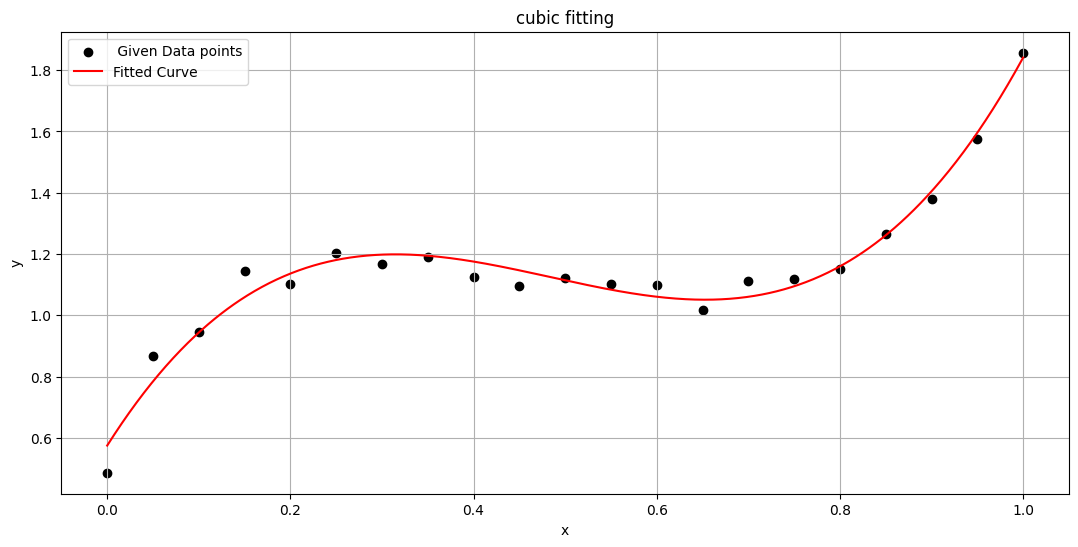

In [5]:

sigma = np.ones(len(xlist))
coeff_list = lib.polynomial_fit(xlist, ylist, sigma, 3)


def poly_fn(x,coefflist):
    sum = 0
    for i in range(len(coefflist)):
        sum += coefflist[i]*x**i
    return sum    


import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.scatter(xlist, ylist, label=' Given Data points', color='black')

xlist_new = np.linspace(min(xlist), max(xlist), 1000)
ylist_new = poly_fn(xlist_new, coeff_list)

plt.plot(xlist_new, ylist_new, label='Fitted Curve', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('cubic fitting')
plt.grid()
plt.legend()
plt.show()

### Fitting with Modified Chebyshev Polynomial

For the modified fit using Chebyshev functions, the coefficients are: [1.17658609 0.40132277 0.03123322 0.23183787]


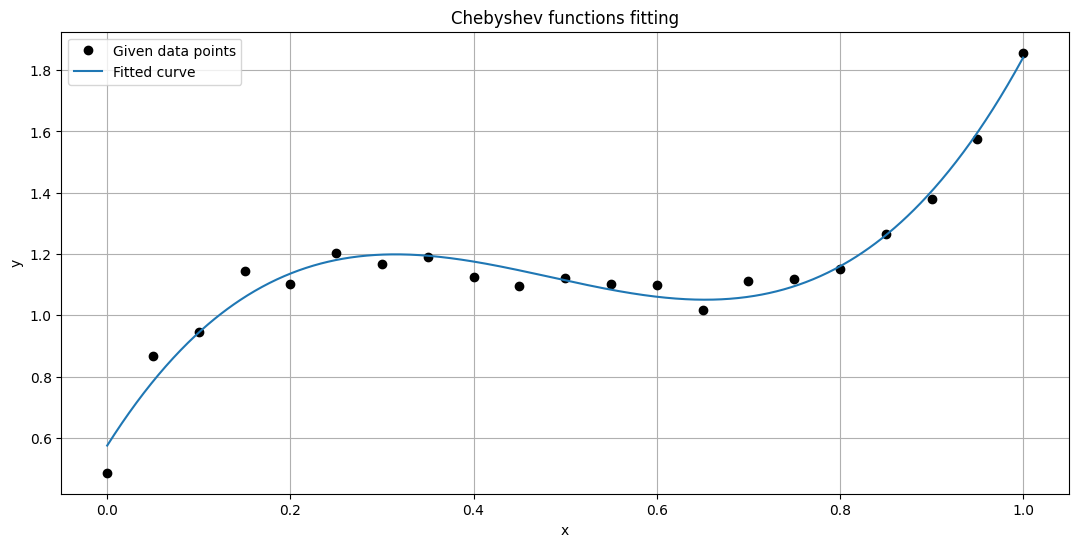

The condition numbers are as follows: 
cubic polynomial fit: 12104.9487
Chebyshev fit: 8.4840
Cubic fitting have higher condition number than Chebyshev fitting. This means that the Chebyshev fitting is more stable and reliable compared to the cubic fitting.


In [10]:
def modified_chebyshev_polynomial(x,degree):
    if degree == 0:
        if type(x) == np.ndarray:
            return np.ones(len(x))
        return 1
    elif degree == 1:
        return (2*x - 1)
    elif degree == 2:
        return (8*(x**3)) - (8*x) + 1
    elif degree == 3:
        return (32*(x**3)) - (48*(x**2)) + (18*x) - 1

coeff_list2 = lib.polynomial_fit_customfn(xlist, ylist, sigma, modified_chebyshev_polynomial, 3)
y_fit2 = lib.customfn_coeff(xlist_new, 3, modified_chebyshev_polynomial, coeff_list2)

print(f'For the modified fit using Chebyshev functions, the coefficients are: {coeff_list2}')
# Plotting the data
plt.figure(figsize=(13,6))
plt.plot(xlist, ylist,'ko', label='Given data points')
plt.plot(xlist_new, y_fit2, label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Chebyshev functions fitting')
plt.grid()
plt.legend()
plt.show()

# calculating condition number
A1, _ = lib.polyfit_matrices(xlist, ylist, sigma, 3)
A2, _ = lib.customfn_fit_matrices(xlist, ylist, sigma, modified_chebyshev_polynomial, 3)

cond_num1 = np.linalg.cond(A1)
cond_num2 = np.linalg.cond(A2)
print("The condition numbers are as follows: ")
print(f'cubic polynomial fit: {cond_num1:.4f}')
print(f'Chebyshev fit: {cond_num2:.4f}')

print(f"Cubic fitting have higher condition number than Chebyshev fitting. This means that the Chebyshev fitting is more stable and reliable compared to the cubic fitting.")



NOTE: Q3 and Q4 are in a seperate pdf file in repository.